<a href="https://colab.research.google.com/github/tiaherdi/Traffic-Sign-5/blob/Khotimatus-Sholihah/Visualisasi_Data_Traffic_Sign_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Read Data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DATA COLLAB/covid_impact_on_airport_traffic.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


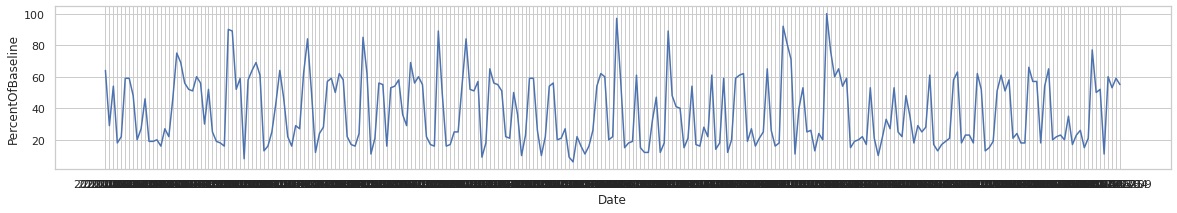

In [63]:
# Based on country
# Data (date, percent of baseline, country)

# style
sns.set(font_scale=1)
sns.set_style("whitegrid")

# plot
fig, ax = plt.subplots(figsize=(20,3))
Australia = df.query("Country == 'Australia'")
sns.lineplot(data=Australia, x='Date', y='PercentOfBaseline')

In [34]:
# Statistik Deskriptif Percent Of Baseline at Australia

Australia.PercentOfBaseline.describe()

count    257.000000
mean      37.750973
std       21.799160
min        6.000000
25%       19.000000
50%       27.000000
75%       56.000000
max      100.000000
Name: PercentOfBaseline, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


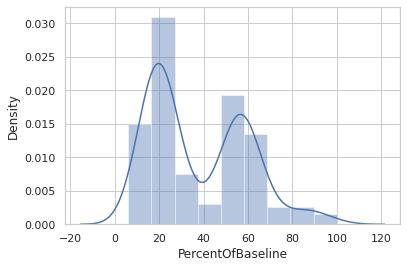

In [38]:
# Density function "Percent of Baseline" at Australia

Graph_percentofbaseline=sns.distplot(Australia.PercentOfBaseline)

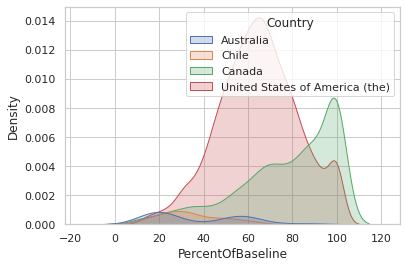

In [37]:
# Comparison of density function "Percent of Baseline" setiap negara

Graph_countries=sns.kdeplot('PercentOfBaseline',hue='Country',data=df,shade=True) 

In [ ]:
# Split data training dan data testing
Australia['Datetime']=pd.to_datetime(Australia.Date)
Train = Australia.query("Datetime < '2020-10-30'")[["Datetime","PercentOfBaseline"]]
Test = Australia.query("Datetime >= '2020-10-30'")[["Datetime","PercentOfBaseline"]]

In [ ]:
#displays a plot of the train/test split
import numpy as np
fig = plt.figure(figsize=(15,5))
plt.plot(Train, color='purple', label='Training')
plt.plot(Test, color='orange', label='Testing')
plt.xlabel('Datetime')
plt.ylabel('PercentOfBaseline')
plt.title('Train-Test Split')
plt.legend()
plt.show()


In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(Train, color='purple', label='Training')